In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from mlxtend.data import loadlocal_mnist
import cv2
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt
# %matplotlib widgetsnbextension

Using TensorFlow backend.


In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/nandi/.local/lib/python3.8/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
classes = 10

In [4]:
X, Y = loadlocal_mnist(images_path='svhn-data/train-images-idx3-ubyte', labels_path='svhn-data/train-labels-idx1-ubyte')

In [5]:
X_test, Y_test = loadlocal_mnist(images_path='svhn-data/t10k-images-idx3-ubyte', labels_path='svhn-data/t10k-labels-idx1-ubyte')

In [6]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
x = X.reshape((60000,28,28,1))
x_test = X_test.reshape((X_test.shape[0],28,28,1))

In [8]:
def display(img):
    cv2.imshow("img",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
Y_test = Y_test.reshape((Y_test.shape[0],1))

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', input_shape = (28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_test,Y_test, epochs=5)

Epoch 1/5


KeyboardInterrupt: 

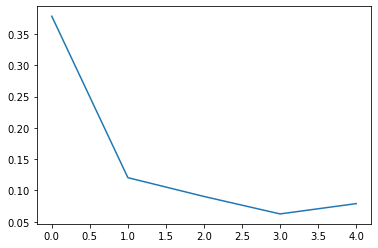

In [22]:
plt.plot(history.history['loss'])
plt.show()

In [347]:
test = model.evaluate(x_test, Y_test)
print("Loss:", test[0])
print("Accuracy:", test[1])

10000/10000 [==============================] - 6s 647us/step
Loss: 0.0897711570638523
Accuracy: 0.9793000221252441


In [157]:
p = 100
print(model.predict(x_test[p].reshape(1,28,28,1)).argmax())
print(Y_test[p])

6
[6]


In [112]:
Y_test[0]

array([7], dtype=uint8)

In [99]:
x_test[0].shape

(28, 28, 1)

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
flatten_11 (Flatten)         (None, 30976)           

In [114]:
model.save('multi_digits_model_0_9.h5')

In [200]:
img = cv2.imread("svhn-data/images/img6.jpg",0)

In [170]:
img = cv2.resize(img,(28,28))
display(img)

In [171]:
img = img.reshape((1,28,28,1))

In [172]:
model.predict(img).argmax()

8

In [177]:
display(img[0])

In [372]:
h, w = img.shape
u = 0
for i in range(0,h-28+1):
    for j in range(0, w-28+1):
        m = img[i:i+28, j:j+28]
        m = m.reshape((1,28,28,1))
        u += 1
#         if u %100 == 0:
#             display(m[0])
        print(model.predict(m).argmax(), end=" ")

3 

In [195]:
l = img[0:28,0:28]

In [198]:
img.shape

(63, 72)

In [204]:
import os
l = os.system('ls')

In [341]:
import cv2
import os
import glob
img_dir = "/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/svhn-data/train_answer" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1,0)
    img = cv2.resize(img,(28,28))
    img[img < 150] = 0
    img[img > 150] = 255
    data.append(255 - img)

In [342]:
data = np.array(data)

In [343]:
data = data.reshape((6,28,28,1))
yy = np.array([3,5,5,4,5,3])
# yy = yy.reshape((6,1))

In [338]:
Y.shape

(60000,)

In [344]:
data = np.append(x,data,axis=0)
y = np.append(Y,yy,axis=0)

In [354]:
import timeit

In [371]:
tic = timeit.default_timer()
a = model.predict(data[58200:60006])
toc = timeit.default_timer()
print(toc-tic)

1.0427113469995675


In [353]:
a[2]

array([1.1698211e-21, 5.6178435e-18, 3.4721345e-18, 4.6040947e-04,
       5.0442771e-12, 9.9953961e-01, 5.4176902e-19, 8.7099322e-15,
       2.2629338e-09, 1.2682927e-08], dtype=float32)

In [345]:
display(data[60004])

In [352]:
y[60003:60006]

array([4, 5, 3])

In [373]:
model2 = keras.models.load_model('svhn-data/test_32x32.mat')

OSError: Unable to open file (file signature not found)

In [379]:
# Import packages 
import cv2
import numpy as np

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('svhn-data/train_answer/3.jpg')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

cv2.imshow('img', vis)

cv2.waitKey(0)

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [380]:
mser = cv2.MSER_create()
img = cv2.imread('svhn-data/train_answer/3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()
regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
for i, contour in enumerate(hulls):
    x,y,w,h = cv2.boundingRect(contour)
    cv2.imwrite('{}.png'.format(i), img[y:y+h,x:x+w])

In [395]:
from scipy.io import loadmat
import mat73

In [396]:
mat = mat73.loadmat('svhn-data/train/digitStruct.mat')

TypeError: only integer scalar arrays can be converted to a scalar index

In [404]:
import h5py
arrays = {}
with h5py.File('svhn-data/train/digitStruct.mat', 'r') as f:
    for k, v in f.items():
        arrays[k] = np.array(v)

In [6]:
from unpacker import DigitStructWrapper

def get_bounding_boxes(start_path = '.'):
    """ Extracts a bounding box file and returns a dictionary
    """
    return DigitStructWrapper(start_path).unpack_all()

# Extract the bounding boxes (this will take a while!)
train_bbox = get_bounding_boxes('svhn-data/train/digitStruct.mat')
# test_bbox = get_bounding_boxes('data/test/digitStruct.mat')
# extra_bbox = get_bounding_boxes('data/extra/digitStruct.mat')

# Display the information stored about an individual image


/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])
/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:27: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [attr.value[0][0]]


NameError: name 'json' is not defined

In [7]:
import json
print(json.dumps(train_bbox[0], indent=2))

{
  "filename": "1.png",
  "boxes": [
    {
      "height": 219.0,
      "label": 1.0,
      "left": 246.0,
      "top": 77.0,
      "width": 81.0
    },
    {
      "height": 219.0,
      "label": 9.0,
      "left": 323.0,
      "top": 81.0,
      "width": 96.0
    }
  ]
}


In [402]:
for k, v in f.items():
    arrays[k] = np.array(v)

TypeError: Not a location id (invalid object ID)

In [24]:
img = x_test[0]

In [25]:
contours = cv2.findContours(img, cv2.RETR_LIST, cv2.RETR_EXTERNAL) 

In [29]:
# imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [54]:
import math

In [75]:
img = cv2.imread('/tmp/3.jpeg',0)
# img = cv2.resize(img, (28,28))
t = np.mean(img) + np.std(img)/2
t = 150
img[img < t] = 0
img[img > t] = 255
vis = cv2.Canny(img,1,0)
display(img)
display(vis)
# mser = cv2.MSER_create()
# regions = mser.detectRegions(vis)
# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(vis)
for p in regions:
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    cv2.rectangle(vis, (xmin,ymax), (xmax,ymin), (150), 1)

display(vis)
vis = cv2.resize(vis, (28,28))
display(vis)
# cv2.polylines(vis, hulls, 10, (125))
cv2.imwrite('/tmp/tmp1.png', vis)
cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [28]:
import random as rng
def thresh_callback(val, src_gray):
    threshold = val
    
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    display(canny_output)
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    print(len(contours))
    for i in range(len(contours)):
        print(i)
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#         cv2.drawContours(drawing, contours_poly, i, color)
        cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 0)
#         cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    
    
#     cv.imshow('Contours', drawing)
    display(drawing)
    cv2.imwrite('out/30.png', drawing)

In [31]:
def th(img):
    t = 150
    img[img < t] = 255
    img[img >= t] = 0

In [196]:
# img = cv2.imread('../second/images/img30.jpg',0)
# img = cv2.GaussianBlur(img,(3,3),200)
# img = cv2.dilate(img, kernel)
img = th1.copy()
img = 255 - img
mask = np.ones(img.shape[:2], np.uint8)*0
mask[10:h-10, 0:w-10] = 255
img = cv2.bitwise_and(img,img,mask = mask)
# t = np.mean(img) + np.std(img)/2
# t = np.mean(img)
print("T:",t)

display(img)
print(img[30])
# img[img < t] = 0
# img[img > t] = 255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img[30])
img = 255 - img
print(img[30])
display(img)
thresh_callback(100,img)

T: 100
[255 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0
   0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
[255 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0
   0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255
 255   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255]
11
0
1
2
3
4
5
6
7
8
9
10


In [157]:
img = cv2.imread('../second/images/img30.jpg',0)
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],dtype = np.uint8)
# kernel = np.ones((5,5),np.uint8)
# img = cv2.GaussianBlur(img,(3,3),10)
img3 = cv2.equalizeHist(img)
display(img3)
img2 = cv2.dilate(img, kernel)
display(img2 - img)

(60, 69)


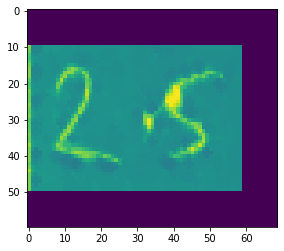

In [187]:
img = cv2.imread('../second/images/img30.jpg',0)
img = 255 - img
# img = cv2.GaussianBlur(img,(3,3),10)
img = cv2.erode(img,kernel,iterations=1)
mask = np.zeros(img.shape[:2], np.uint8)
# display(mask)
h,w = img.shape
print(img.shape)
mask[10:h-10, 0:w-10] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img);
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
# plt.plot(hist_full)
# plt.plot(hist_mask)
# plt.show()
t = 100
img[img < t] = 0
img[img > t] = 255
display(img)

### OTSU Thresholding 

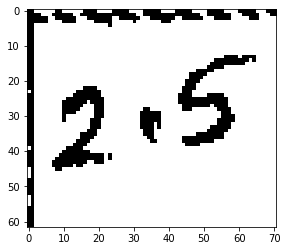

In [183]:
im = cv2.imread('../second/images/img7.jpg',0)
_,th1 = cv2.threshold(im, 127,255, cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray');

In [30]:
im = cv2.imread('../second/images/img7.jpg',0)
_,th1 = cv2.threshold(im, 127,255, cv2.THRESH_OTSU)
# plt.imshow(th1,cmap='gray');
img = th1.copy()
img = 255 - img
mask = np.ones(img.shape[:2], np.uint8)*0
mask[10:h-10, 0:w-10] = 255
img = cv2.bitwise_and(img,img,mask = mask)
# t = np.mean(img) + np.std(img)/2
# t = np.mean(img)
print("T:",t)

display(img)
print(img[30])
# img[img < t] = 0
# img[img > t] = 255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img[30])
img = 255 - img
print(img[30])
display(img)
thresh_callback(100,img)

True

In [41]:
np.array(regions)

ValueError: could not broadcast input array from shape (28,4) into shape (28)

In [44]:
for p in regions:
    print(np.array(p).shape)

(28,)
(28, 4)


In [46]:
len(regions)

2